In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from skimage.io import imread

import cv2

In [3]:
mal_images = glob('../input/skin-cancer-malignant-vs-benign/data/train/malignant/*')
ben_images = glob('../input/skin-cancer-malignant-vs-benign/data/train/benign/*')

In [4]:
len(mal_images)

1197

In [5]:
mal_images[0:5]

['../input/skin-cancer-malignant-vs-benign/data/train/malignant/919.jpg',
 '../input/skin-cancer-malignant-vs-benign/data/train/malignant/1357.jpg',
 '../input/skin-cancer-malignant-vs-benign/data/train/malignant/795.jpg',
 '../input/skin-cancer-malignant-vs-benign/data/train/malignant/84.jpg',
 '../input/skin-cancer-malignant-vs-benign/data/train/malignant/698.jpg']

In [6]:
print(len(ben_images))
ben_images[0:5]

1440


['../input/skin-cancer-malignant-vs-benign/data/train/benign/795.jpg',
 '../input/skin-cancer-malignant-vs-benign/data/train/benign/33.jpg',
 '../input/skin-cancer-malignant-vs-benign/data/train/benign/1505.jpg',
 '../input/skin-cancer-malignant-vs-benign/data/train/benign/698.jpg',
 '../input/skin-cancer-malignant-vs-benign/data/train/benign/1548.jpg']

In [7]:
benign=pd.DataFrame()
labels = []
for imagePath in ben_images:
  column_name=imagePath.split('/')[-1].split('.')[0]
  image=cv2.imread(imagePath)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  benign[column_name]= image.flatten()
  labels.append('0')

In [8]:
benign.shape

(50176, 1440)

In [9]:
benign=benign.transpose()


In [10]:
benign['label']=labels

In [11]:
labels_2 = []
malignant=pd.DataFrame()

for imagePath in mal_images:
  column_name=imagePath.split('/')[-1]
  image=cv2.imread(imagePath)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # image=cv2.resize(image, (300, 300),interpolation=cv2.INTER_AREA)
  malignant[column_name]=image.flatten()
  labels_2.append('1')

In [12]:
malignant=malignant.transpose()

In [13]:
malignant['label']=labels_2

In [14]:
df = pd.concat([benign, malignant])

In [15]:
df['label'].value_counts()

0    1440
1    1197
Name: label, dtype: int64

In [16]:
Xtrain=df.drop(['label'],axis=1)

In [17]:
!pip install kmapper

In [18]:
import kmapper as km

import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets

In [19]:
# Initialize to use t-SNE with 2 components (reduces data to 2 dimensions). Also note high overlap_percentage.
mapper_full = km.KeplerMapper(verbose=2)

# Fit and transform data
projected_data_full = mapper_full.fit_transform(Xtrain,
                                      projection=sklearn.manifold.TSNE(perplexity=50))



KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: TSNE(perplexity=50)
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (2637, 50176)

..Projecting data using: 
	TSNE(perplexity=50, verbose=2)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2637 samples in 15.945s...
[t-SNE] Computed neighbors for 2637 samples in 805.385s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2637
[t-SNE] Computed conditional probabilities for sample 2000 / 2637
[t-SNE] Computed conditional probabilities for sample 2637 / 2637
[t-SNE] Mean sigma: 1701.548192
[t-SNE] Computed conditional probabilities in 0.454s
[t-SNE] Iteration 50: error = 72.8123474, gradient norm = 0.0735112 (50 iterations in 1.424s)
[t-SNE] Iteration 100: error = 70.4027710, gradient norm = 0.0512427 (50 iterations in 1.016s)
[t-SNE] Iteration 150: error = 70.3392944, gradient norm = 0.0594961 (50 iterations in 0.877s)
[t-SNE] Iteration 200: error = 70.3513260

In [20]:
# Create the graph (we cluster on the projected data and suffer projection loss)
graph_full = mapper_full.map(projected_data_full,
                   clusterer=sklearn.cluster.DBSCAN(eps=0.3, min_samples=15),
                   cover=km.Cover(35, 0.4))

Mapping on data shaped (2637, 2) using lens shaped (2637, 2)

Minimal points in hypercube before clustering: 15
Creating 1225 hypercubes.
Cube_0 is empty.

Cube_1 is empty.

Cube_2 is empty.

Cube_3 is empty.

Cube_4 is empty.

Cube_5 is empty.

Cube_6 is empty.

Cube_7 is empty.

Cube_8 is empty.

Cube_9 is empty.

Cube_10 is empty.

Cube_11 is empty.

Cube_12 is empty.

Cube_13 is empty.

Cube_14 is empty.

Cube_15 is empty.

Cube_16 is empty.

Cube_17 is empty.

Cube_18 is empty.

Cube_19 is empty.

Cube_20 is empty.

Cube_21 is empty.

Cube_22 is empty.

Cube_23 is empty.

Cube_24 is empty.

Cube_25 is empty.

Cube_26 is empty.

Cube_27 is empty.

Cube_28 is empty.

Cube_29 is empty.

Cube_30 is empty.

Cube_31 is empty.

Cube_32 is empty.

Cube_33 is empty.

Cube_34 is empty.

Cube_35 is empty.

Cube_36 is empty.

Cube_37 is empty.

Cube_38 is empty.

Cube_39 is empty.

Cube_40 is empty.

Cube_41 is empty.

Cube_42 is empty.

Cube_43 is empty.

Cube_44 is empty.

Cube_45 is empty.


Cube_425 is empty.

Cube_426 is empty.

Cube_427 is empty.

Cube_428 is empty.

Cube_429 is empty.

Cube_430 is empty.

Cube_431 is empty.

Cube_432 is empty.

Cube_433 is empty.

Cube_434 is empty.

Cube_435 is empty.

Cube_436 is empty.

Cube_437 is empty.

Cube_438 is empty.

Cube_439 is empty.

Cube_440 is empty.

Cube_441 is empty.

Cube_442 is empty.

Cube_443 is empty.

Cube_444 is empty.

Cube_445 is empty.

Cube_446 is empty.

Cube_447 is empty.

Cube_448 is empty.

Cube_449 is empty.

Cube_450 is empty.

Cube_451 is empty.

Cube_452 is empty.

Cube_453 is empty.

Cube_454 is empty.

Cube_455 is empty.

Cube_456 is empty.

Cube_457 is empty.

Cube_458 is empty.

Cube_459 is empty.

Cube_460 is empty.

Cube_461 is empty.

Cube_462 is empty.

Cube_463 is empty.

Cube_464 is empty.

Cube_465 is empty.

Cube_466 is empty.

Cube_467 is empty.

Cube_468 is empty.

Cube_469 is empty.

Cube_470 is empty.

Cube_471 is empty.

Cube_472 is empty.

Cube_473 is empty.

Cube_474 is empty.


In [21]:
Y=df['label']

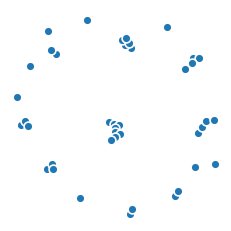

In [22]:
# Matplotlib examples
km.draw_matplotlib(graph_full)
plt.show()

In [23]:
# Tooltips with the target y-labels for every cluster member
mapper_full.visualize(graph_full,
                 title="Skin Cancer Mapper with  Labels ",
                 path_html="/kaggle/working/skin_cancer_ylabel_images.html",
                 custom_tooltips=Y)



Wrote visualization to: /kaggle/working/skin_cancer_ylabel_images.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Skin Cancer Mapper with  Labels  | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  position: absolute;\n  right: 00px;\n  top: 0px;\n  width: 90px;\n  height: 90px;\n  z-index: 999999;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: upper